In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
np.random.seed(42) #给numpy随机数指定种子，这样生成随机数，就会固定

n_samples,n_features = 50,200

#生成样本
x = np.random.randn(n_samples,n_features)
print(x)

#系数，也就是W
coef = 3*np.random.randn(n_features)
print(coef)
#系数归零化索引
inds = np.arange(n_features)
print(inds)
#打乱顺序
np.random.shuffle(inds)
print(inds)


#对系数进行归零化处理
coef[inds[10:]] = 0
print(coef)
#目标值
y = np.dot(x,coef)
print(y)

#增加噪声
y += 0.01*np.random.normal(n_samples)

[[ 0.49671415 -0.1382643   0.64768854 ...  0.15372511  0.05820872
  -1.1429703 ]
 [ 0.35778736  0.56078453  1.08305124 ...  1.35387237 -0.11453985
   1.23781631]
 [-1.59442766 -0.59937502  0.0052437  ... -0.97876372 -0.44429326
   0.37730049]
 ...
 [ 0.71523658 -0.39335112 -1.58718807 ... -0.03756351  0.56975892
  -0.32417686]
 [-2.19750101  1.26871389  0.19022322 ...  0.3753597  -0.11518833
  -1.18308552]
 [ 0.93381043  0.50323238  2.30563684 ... -0.70531672  0.49576557
   0.64438845]]
[-2.03548419 -0.91649839 -1.79214318  0.33125414  3.59153559 -2.31312647
  3.00246149 -2.34501622 -2.54288164  2.45578386  2.76580913  2.55422981
 -3.94739222 -1.39785293  2.46896578  0.12462552 -3.22107854  1.37495382
 -2.14442178  5.38357455  4.63452439  1.81229228  4.08302011  0.19437405
  2.29631248  4.43316089  0.73649605 -0.76556151 -5.11386587 -0.24940058
  2.47026955  2.83690028  1.5130952  -1.62389728 -5.93046471 -1.48564529
 -0.91303461 -0.9387869   1.85566907  5.95702923  0.37058761 -0.650195

In [13]:
x.shape

(50, 200)

In [14]:
y.shape

(50,)

In [15]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [19]:
print(coef)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          2.55422981
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.73649605  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          5.95702923  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          5.54598921  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0. 

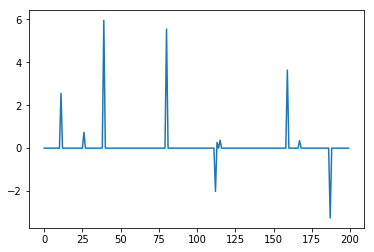

In [16]:
plt.plot(coef)

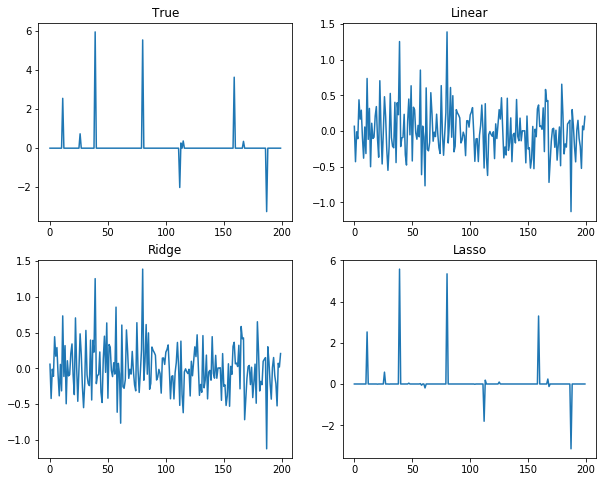

In [20]:
linear=LinearRegression()
ridge=Ridge(alpha=0.0000001)
lasso=Lasso(alpha=0.1)

linear.fit(x,y)
ridge.fit(x,y)
lasso.fit(x,y)

coefs=[coef,linear.coef_,ridge.coef_,lasso.coef_]
labels=['True','Linear','Ridge','Lasso']

plt.figure(figsize=(10,8))
for i in range(len(labels)):
    axes=plt.subplot(2,2,i+1)
    axes.set_title(labels[i])
    axes.plot(coefs[i])

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression


In [24]:
diabetes = datasets.load_diabetes() #糖尿病的信息
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [28]:
#获取索引是2的数据
diabetes_X = diabetes.data[:,np.newaxis,2]
# print(diabetes_X)
diabetes_X_train = diabetes_X[:-20]

diabetes_X_test = diabetes_X[-20:]

diabetes_Y = diabetes.target
print(diabetes_Y)
diabetes_Y_train = diabetes_Y[:-20]
diabetes_Y_test = diabetes_Y[-20:]

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [29]:
regr = LinearRegression()

# 第1步：训练
regr.fit(diabetes_X_train,diabetes_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

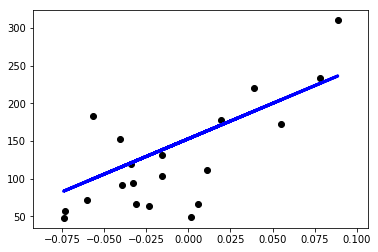

In [32]:
plt.scatter(diabetes_X_test,diabetes_Y_test,color = 'black')

plt.plot(diabetes_X_test,regr.predict(diabetes_X_test),color = 'blue',lw = 3)

plt.show()

In [45]:
a=np.array([[3,3.5,2],[3.2,3.6,3],[6,7,4]])

In [46]:
print(a)

[[3.  3.5 2. ]
 [3.2 3.6 3. ]
 [6.  7.  4. ]]


In [49]:
np.linalg.matrix_rank(a)

2

In [50]:
a_ = np.linalg.inv(a)

LinAlgError: Singular matrix